<h1 style = "color : green"> External Diversion</h1>

<b> This Notebook is used to Visualize the User Browsing Behavior </b>

<b style = "color : red" > 1. Including all the import statements </b>

In [2]:
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
pd.options.display.max_columns = 100
import matplotlib
matplotlib.style.use('ggplot')
import numpy as np
pd.options.display.max_rows = 100
from itertools import islice
import urllib2
from bs4 import BeautifulSoup
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from DatumBox import DatumBox
import re
from urlparse import urlparse
import seaborn as sns # To have more than seven colors in pie diagram
import plotly.plotly as py # For Gantt Chart
import plotly.figure_factory as ff # For Gantt Chart

/home/sreeram_0xb5e/miniconda2/envs/old/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


<b style = "color : red" > 2. Read the Data from the CSV file with pandas </b>

In [3]:
data = pd.read_csv('beta.csv')

#To Reverse The Dataframe rows 
data = data.sort_index(axis=1 ,ascending=True)
data = data.iloc[::-1]
data = data.sort_index(ascending=True, axis=0)
data = data.reindex(index=data.index[::-1])
data.head()

,<ROOT>_id,"[]""_id""",id,lastVisitTime,title,typedCount,url,visitCount
128,2000001,3000139,47,8/10/2017 9:07:24 AM,NaN,0,https://accounts.google.com/signin/v2/identifi...,1
127,2000001,3000138,48,8/10/2017 9:08:08 AM,NaN,0,https://accounts.google.com/signin/v2/sl/pwd?c...,1
126,2000001,3000137,49,8/10/2017 9:13:03 AM,NaN,0,https://accounts.google.com/signin/v2/challeng...,3
125,2000001,3000136,50,8/10/2017 9:13:29 AM,Google Accounts,0,https://accounts.google.com/CheckCookie?hl=en&...,1
124,2000001,3000135,56,8/10/2017 9:16:26 AM,Gmail,0,https://mail.google.com/mail/u/0/#inbox/15dcb6...,1


<b style = "color : red" > 3. Cleaning up the data by removing the unwanted fields </b>

In [4]:
#data = data.drop(["[]_id",'<ROOT>_id','typedCount'],axis=1)
#data = data.dropna()
#data.drop(48)
data

,<ROOT>_id,"[]""_id""",id,lastVisitTime,title,typedCount,url,visitCount
128,2000001,3000139,47,8/10/2017 9:07:24 AM,NaN,0,https://accounts.google.com/signin/v2/identifi...,1
127,2000001,3000138,48,8/10/2017 9:08:08 AM,NaN,0,https://accounts.google.com/signin/v2/sl/pwd?c...,1
126,2000001,3000137,49,8/10/2017 9:13:03 AM,NaN,0,https://accounts.google.com/signin/v2/challeng...,3
125,2000001,3000136,50,8/10/2017 9:13:29 AM,Google Accounts,0,https://accounts.google.com/CheckCookie?hl=en&...,1
124,2000001,3000135,56,8/10/2017 9:16:26 AM,Gmail,0,https://mail.google.com/mail/u/0/#inbox/15dcb6...,1
123,2000001,3000134,59,8/10/2017 9:17:14 AM,NaN,0,https://mail-attachment.googleusercontent.com/...,1
122,2000001,3000133,55,8/10/2017 9:20:03 AM,mail.google.com,0,https://mail.google.com/mail/u/0/#inbox/15dcb6...,2
121,2000001,3000132,66,8/10/2017 9:21:44 AM,basic login screen code pen - Google Search,0,https://www.google.co.in/search?q=basic+login+...,1
120,2000001,3000131,67,8/10/2017 9:21:50 AM,Pens tagged 'login' on CodePen,0,https://codepen.io/tag/login/,2
119,2000001,3000130,69,8/10/2017 9:22:04 AM,NaN,0,https://codepen.io/tag/login/3/,1


<b style = "color : red" >4. categorizing the URL</b>

In [5]:
TAG_RE = re.compile(r"<[^>]+>")
def remove_tags(text):
    return TAG_RE.sub('', text)

# Clean Up Function
def clean_up(text1):
    char_dic = [' ','a','b','c','d','e','f','g','h','i','j','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y','z','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
    temp = []
    res = ""
    temp = text1.split(' ')

    for i in temp:
        flag = 0
        for j in str(i):
            if j not in char_dic:
                flag += 1
        if (flag == 0):
            res += i
        res += " "
            
    return res


def datum_categ(text):

    datum_box = DatumBox("4e9f0a6e14a83e38d9d9fac895c84e68")
    return datum_box.topic_classification(text)

def text_extract(url):
    try:
        
        try:
            page3 = urllib2.urlopen(url).read()
        
        except urllib2.HTTPError, err:
        
            if err.code == 404:
                print "Page not found!"
                return 'Error'
        
            elif err.code == 403:
                print "Access denied!"
                return 'Error'
    
            else:
                print "Something happened! Error code", err.code
                return 'Error'
        
        except urllib2.URLError, err:
            print "Some other error happened:", err.reason
            return 'Error'
        
        #page3 = urllib2.urlopen(url).read()
    
        soup3 = BeautifulSoup(page3,"html.parser")

        final_res = ""
        #If-Else Condition to Check null case
        
        if (soup3 is None):
            print "Its NONE!"
        else:
     
            
            if (soup3.h1 is not None):
                if (clean_up(str(soup3.h1)) is not None):
                    final_res += clean_up(str(soup3.h1))
            
            if (soup3.h2 is not None):
                if (clean_up(str(soup3.h2)) is not None):
                    final_res += clean_up(str(soup3.h2))
            
            if (soup3.h3 is not None):
                if (clean_up(str(soup3.h3)) is not None):
                    final_res += clean_up(str(soup3.h3))

            if (soup3.h4 is not None):
                if (clean_up(str(soup3.h4)) is not None):
                    final_res += clean_up(str(soup3.h4))

            if (soup3.h5 is not None):
                if (clean_up(str(soup3.h5)) is not None):
                    final_res += clean_up(str(soup3.h5))

            if (soup3.h6 is not None):
                if (clean_up(str(soup3.h6)) is not None):
                    final_res += clean_up(str(soup3.h6))
            

            if (soup3.p is not None):
                if (clean_up(str(soup3.p)) is not None):
                    final_res += clean_up(str(soup3.p))
            

            if(soup3.title is not None):
                if (clean_up(str(soup3.title)) is not None):
                    final_res += clean_up(str(soup3.title))
            

            flag = ""

            if(soup3.p is not None):
                for node in soup3.findAll('p'):
                    flag += ''.join(node.findAll(text=True))

                z = clean_up(str(flag.encode('utf-8')))
                if(z is not None):
                    final_res += z
            

            desc = soup3.findAll(attrs={"name":"description"}) 
            if (len(desc) > 0):
                zi = clean_up(str(desc[0]['content'].encode('utf-8')))
                if (zi is not None):
                    final_res+= zi 
            else:
                print "DESCRIPTION IS NONE!"

        
        return final_res
        
    except urllib2.HTTPError as err:
        print "Error Occured!"
        return 0


def categ(a):
    url = a
    return datum_categ(text_extract(url))
    


In [6]:
x = data

test_data = x.loc[:,('title','url','lastVisitTime','visitCount')] 


def categorize (name):
    if('www.google' in str(name)): 
        return 'Search' 
    elif ('mail' in str(name)):
        return 'Mail'
    else:
        return categ(name)

test_data['category'] = test_data['url'].map(categorize)

test_data

Access denied!
Access denied!
Access denied!
Some other error happened: [Errno 2] No such file or directory: '/home/sreeram_0xb5e/Downloads/q2.html'
Access denied!
Some other error happened: [Errno 2] No such file or directory: '/home/sreeram_0xb5e/Desktop/L&t/index.html'
DESCRIPTION IS NONE!
Access denied!
Access denied!
Access denied!
Access denied!
Access denied!
Access denied!
Access denied!
Access denied!
Access denied!
Access denied!
Access denied!
Access denied!
Access denied!
Access denied!
Some other error happened: [Errno 2] No such file or directory: '/home/sreeram_0xb5e/Desktop/ASSIGN/index.html'


No handlers could be found for logger "bs4.dammit"


DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
Some other error happened: [Errno 2] No such file or directory: '/home/sreeram_0xb5e/Desktop/ASSIGN/index.html'
Some other error happened: [Errno 2] No such file or directory: '/home/sreeram_0xb5e/Downloads/arrayfunctions.html'
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
Some other error happened: [Errno -2] Name or service not known
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
Page not found!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!
DESCRIPTION IS NONE!


,title,url,lastVisitTime,visitCount,category
128,NaN,https://accounts.google.com/signin/v2/identifi...,8/10/2017 9:07:24 AM,1,Mail
127,NaN,https://accounts.google.com/signin/v2/sl/pwd?c...,8/10/2017 9:08:08 AM,1,Mail
126,NaN,https://accounts.google.com/signin/v2/challeng...,8/10/2017 9:13:03 AM,3,Mail
125,Google Accounts,https://accounts.google.com/CheckCookie?hl=en&...,8/10/2017 9:13:29 AM,1,Mail
124,Gmail,https://mail.google.com/mail/u/0/#inbox/15dcb6...,8/10/2017 9:16:26 AM,1,Mail
123,NaN,https://mail-attachment.googleusercontent.com/...,8/10/2017 9:17:14 AM,1,Mail
122,mail.google.com,https://mail.google.com/mail/u/0/#inbox/15dcb6...,8/10/2017 9:20:03 AM,2,Mail
121,basic login screen code pen - Google Search,https://www.google.co.in/search?q=basic+login+...,8/10/2017 9:21:44 AM,1,Search
120,Pens tagged 'login' on CodePen,https://codepen.io/tag/login/,8/10/2017 9:21:50 AM,2,Computers & Technology
119,NaN,https://codepen.io/tag/login/3/,8/10/2017 9:22:04 AM,1,Computers & Technology


<b style = "color : red" >5. Calculating the amount of time spent on each URL</b>

In [9]:
i_max = test_data.shape[0]
time_diff = []

for i in range (i_max-1,0,-1):
    j = i-1
    
    
    i_base = test_data.iloc[i]['lastVisitTime']
    j_base = test_data.iloc[j]['lastVisitTime']
    if (i_base.split('/')[0] == j_base.split('/')[0] ):
        if (i_base .split('/')[1] == j_base.split('/')[1] ):
            if (i_base.split('/')[2].split(' ')[1].split(':')[0] == j_base.split('/')[2].split(' ')[1].split(':')[0]):
                j_min = int (j_base.split('/')[2].split(' ')[1].split(':')[1]) * 60 
                j_sec = int (j_base.split('/')[2].split(' ')[1].split(':')[2])
                j_time = j_min + j_sec
            

                i_min = int (i_base.split('/')[2].split(' ')[1].split(':')[1]) * 60 
                i_sec = int (i_base.split('/')[2].split(' ')[1].split(':')[2])
                i_time = i_min + i_sec
            
                time_diff.append(i_time - j_time)
            else:
                time_diff.append('NA')
        else:
             time_diff.append('NA')
    else:
         time_diff.append('NA')

time_diff.append('NA')

time_diff = time_diff[::-1]
td = pd.Series(time_diff)
test_data['timeSpent'] = td.values

In [10]:
test_data

,title,url,lastVisitTime,visitCount,category,timeSpent
128,NaN,https://accounts.google.com/signin/v2/identifi...,8/10/2017 9:07:24 AM,1,Mail,NA
127,NaN,https://accounts.google.com/signin/v2/sl/pwd?c...,8/10/2017 9:08:08 AM,1,Mail,44
126,NaN,https://accounts.google.com/signin/v2/challeng...,8/10/2017 9:13:03 AM,3,Mail,295
125,Google Accounts,https://accounts.google.com/CheckCookie?hl=en&...,8/10/2017 9:13:29 AM,1,Mail,26
124,Gmail,https://mail.google.com/mail/u/0/#inbox/15dcb6...,8/10/2017 9:16:26 AM,1,Mail,177
123,NaN,https://mail-attachment.googleusercontent.com/...,8/10/2017 9:17:14 AM,1,Mail,48
122,mail.google.com,https://mail.google.com/mail/u/0/#inbox/15dcb6...,8/10/2017 9:20:03 AM,2,Mail,169
121,basic login screen code pen - Google Search,https://www.google.co.in/search?q=basic+login+...,8/10/2017 9:21:44 AM,1,Search,101
120,Pens tagged 'login' on CodePen,https://codepen.io/tag/login/,8/10/2017 9:21:50 AM,2,Computers & Technology,6
119,NaN,https://codepen.io/tag/login/3/,8/10/2017 9:22:04 AM,1,Computers & Technology,14


<br>
<br>
<b style = "color : red ;font-size: 20px " >6. Visualizing the Data to understand the browsing behavior</b>
<br>
<br>

<b >6.1 Amount Of Time Spent On Each Category </b>

[('Arts', 374), ('Business & Economy', 0), ('Computers & Technology', 3566), ('Error', 0), ('Health', 0), ('Home & Domestic Life', 898), ('Mail', 909), ('News', 675), ('Recreation & Activities', 0), ('Reference & Education', 137), ('Science', 719), ('Search', 2970), ('Shopping', 8), ('Society', 129), ('Sports', 0)]
Amount Of Time Spent On Each Category


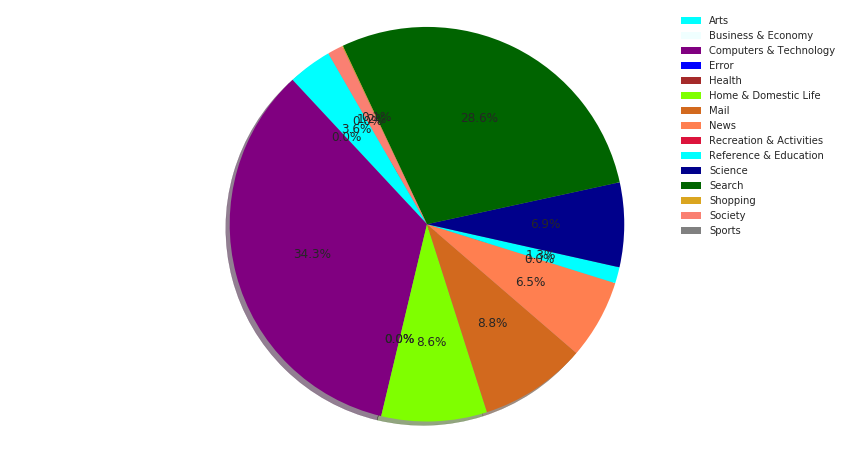

In [11]:
# Listing the lables
labels = "Arts","Business & Economy","Computers & Technology","Health","Home & Domestic Life","Mail","News","Search","Shopping","Society","Sports","Recreation & Activities","Reference & Education","Science","Error"


# Augumenting the time spent on each label
i_max = test_data.shape[0]


category_dict = {"Arts":0 ,"Business & Economy":0,
                 "Computers & Technology":0,"Error":0,
                 "Health":0,"Home & Domestic Life":0,"News":0,"Shopping":0,"Society":0,
                 "Sports":0,"Recreation & Activities":0,"Reference & Education":0,"Science":0,
                 "Search":0,"Mail":0}



for i in range(0,i_max):
    if (str(test_data.iloc[i]['timeSpent']) is "NA" ):
        category_dict[test_data.iloc[i]['category']] += 0
    else:
        category_dict[test_data.iloc[i]['category']] += int(test_data.iloc[i]['timeSpent'])


ordered_category_dict = sorted(category_dict.items())

sizes = []

for i in ordered_category_dict:
    sizes.append(i[1])



print ordered_category_dict
#print sizes

# Now drawing the Pie Diagrm

fig1, ax1 = plt.subplots(figsize=(15,8))
#colors = sns.color_palette("hls",14)

colors = ['black','azure','purple','blue','brown','chartreuse','chocolate','coral','crimson','cyan','darkblue',
          'darkgreen','goldenrod','salmon','grey']

ax1.pie(sizes, explode=None ,colors = colors, labels=None, autopct='%1.1f%%',
        shadow=True, startangle=120)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(("Arts","Business & Economy","Computers & Technology","Error","Health","Home & Domestic Life","Mail","News",'Recreation & Activities',
            'Reference & Education','Science','Search','Shopping','Society','Sports'),
           scatterpoints=1,loc='upper right',fontsize=10)

print 'Amount Of Time Spent On Each Category'
plt.show()



<br>
<br>
<b >6.2 Time Spent on each category in Chronological order</b>
<br>
<br>

In [16]:
# mapping the catagories with specific colors

color_dict = { "Arts":"black","Business & Economy":"azure","Computers & Technology":"purple","Error":"blue",
              "Health":"brown", "Home & Domestic Life" : "chartreuse","Mail":"chocolate","News":"coral",
              "Recreation & Activities":"crimson", 'Reference & Education':"cyan",'Science':"darkblue",
              "Search":"darkgreen",'Shopping':"goldenrod",'Society':"salmon",'Sports':"grey" }


color_list = []
def map_color(color):
        return color_dict[color]

for i in range(0,test_data.shape[0]):
    color_list.append(map_color(test_data.iloc[i]['category']))

td = pd.Series(color_list)
test_data['color'] = td.values

test_data

,title,url,lastVisitTime,visitCount,category,timeSpent,color
128,NaN,https://accounts.google.com/signin/v2/identifi...,8/10/2017 9:07:24 AM,1,Mail,NA,chocolate
127,NaN,https://accounts.google.com/signin/v2/sl/pwd?c...,8/10/2017 9:08:08 AM,1,Mail,44,chocolate
126,NaN,https://accounts.google.com/signin/v2/challeng...,8/10/2017 9:13:03 AM,3,Mail,295,chocolate
125,Google Accounts,https://accounts.google.com/CheckCookie?hl=en&...,8/10/2017 9:13:29 AM,1,Mail,26,chocolate
124,Gmail,https://mail.google.com/mail/u/0/#inbox/15dcb6...,8/10/2017 9:16:26 AM,1,Mail,177,chocolate
123,NaN,https://mail-attachment.googleusercontent.com/...,8/10/2017 9:17:14 AM,1,Mail,48,chocolate
122,mail.google.com,https://mail.google.com/mail/u/0/#inbox/15dcb6...,8/10/2017 9:20:03 AM,2,Mail,169,chocolate
121,basic login screen code pen - Google Search,https://www.google.co.in/search?q=basic+login+...,8/10/2017 9:21:44 AM,1,Search,101,darkgreen
120,Pens tagged 'login' on CodePen,https://codepen.io/tag/login/,8/10/2017 9:21:50 AM,2,Computers & Technology,6,purple
119,NaN,https://codepen.io/tag/login/3/,8/10/2017 9:22:04 AM,1,Computers & Technology,14,purple


</br>
</br>
Choosing the Sample Data from Detailed Analysis
</br>
</br>

In [17]:
print test_data.shape[0]

sample_test_data = test_data[:]
print sample_test_data.shape[0]

129
129


</br>
</br>
Time Spent Graph
</br>
</br>

In [1]:
time_spent_list = []

temp = 0
temp_category = ''


switch_time = []
count = 1
switch_temp = 0

for i in range(0,sample_test_data.shape[0]):
    
    if (sample_test_data.iloc[i]['timeSpent'] =='NA'):
        time_spent_list.append(0)
    
    else:
        
        switch_temp += sample_test_data.iloc[i]['timeSpent']
        if ((temp_category == sample_test_data.iloc[i]['category']) or (sample_test_data.iloc[i]['category'] == 'Search') 
             or (temp_category == 'Computers & Technology' and sample_test_data.iloc[i]['category'] == 'Science') or
             (temp_category == 'Science' and sample_test_data.iloc[i]['category'] == 'Computers & Technology')):
        
            acc_temp = temp + sample_test_data.iloc[i]['timeSpent']
            time_spent_list.append(acc_temp)
            temp = acc_temp
            
        else:
            count += 1
            temp = sample_test_data.iloc[i]['timeSpent']
            time_spent_list.append(temp)
            temp_category = sample_test_data.iloc[i]['category']
        
        switch_time.append(switch_temp/count)

        

figure = plt.figure(figsize=(15,8))
pts = np.arange(sample_test_data.shape[0])
p = plt.bar(pts, height= time_spent_list)



for i in range(0,sample_test_data.shape[0]):
    p.patches[i].set_color(color_list[i])
    

plt.show()

print switch_time

NameError: name 'sample_test_data' is not defined

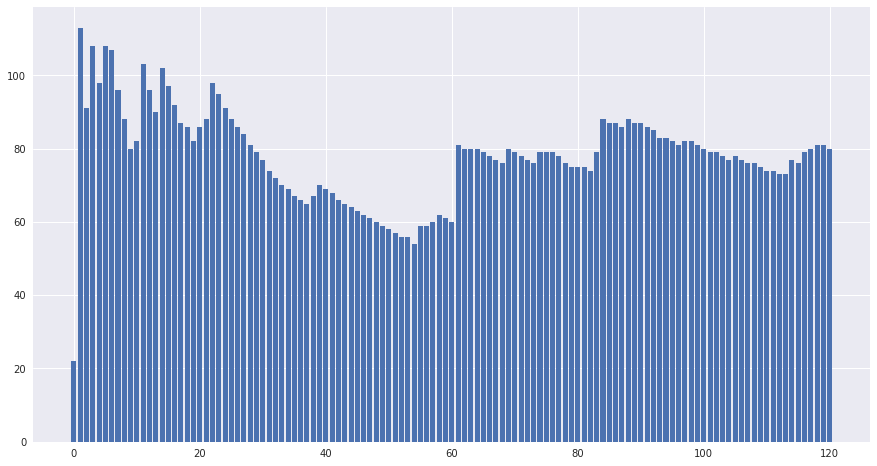






AVERAGE SWITCHING TIME
80


In [19]:
temp = 0
count = 0

count_arr= []
sr_arr = []

for i in range(0,sample_test_data.shape[0]):
    count += 1
    if (sample_test_data.iloc[i]['timeSpent'] is not 'NA'):
        temp = temp + sample_test_data.iloc[i]['timeSpent']
        sr_arr.append(temp/count) 
        

figure = plt.figure(figsize=(15,8))
pts = np.arange(len(sr_arr))
p = plt.bar(pts, height= sr_arr)

plt.show()

print "\n\n\n\n"
print "AVERAGE SWITCHING TIME"

print  temp/count 